# Import packages and data

In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [4]:
urls = [
    "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=drive_link",
    "https://drive.google.com/file/d/1Vu0q91qZw6lqhIqbjoXYvYAQTmVHh6uZ/view?usp=drive_link",
    "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=drive_link",
    "https://drive.google.com/file/d/1m1ThDDIYRTTii-rqM5SEQjJ8McidJskD/view?usp=drive_link"
]

file_names = ["df_prod.csv", "df_orders.csv", "df_orderlines.csv", "df_brands.csv"]

def read_csv_from_drive(url, file_name):
    path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
    return pd.read_csv(path)

df_prod, df_ord, df_orderlines, df_brands = [read_csv_from_drive(url, file_name) for url, file_name in zip(urls, file_names)]

df_prod.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [5]:
# Define the file path
#folder_path = r"C:\Users\sumit\Dropbox\WBS Bootcamp\Course\3. Data cleaning project\Group 4\Data"

# Rather manual stuff. But for an automated way, see Alternative II below 
#df_prod = pd.read_csv(f"{folder_path}\\products.csv")
#df_ord = pd.read_csv(f"{folder_path}\\orders.csv")
#df_orderlines = pd.read_csv(f"{folder_path}\\orderlines.csv")
#df_brands = pd.read_csv(f"{folder_path}\\brands.csv")

#Lets check if it works!
#df_prod.head()

# Data cleaning
## 1. Products dataframe

In [6]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          19326 non-null  object
 1   name         19326 non-null  object
 2   desc         19319 non-null  object
 3   price        19280 non-null  object
 4   promo_price  19326 non-null  object
 5   in_stock     19326 non-null  int64 
 6   type         19276 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


**Note: ** Columns "price" and "promo_price" are strings, and not numerical. Some missing observations
### Lets check duplicates and drop them

In [7]:
print("This dataframe has the following num of duplicates: ", len(df_prod)-len(df_prod.drop_duplicates()))

This dataframe has the following num of duplicates:  8746


In [8]:
df_prod_dropped = df_prod.drop_duplicates()
df_prod_dropped.shape

(10580, 7)

In [9]:
print("This dataframe has the following missing values: ", df_prod_dropped.isna().sum())

This dataframe has the following missing values:  sku             0
name            0
desc            7
price          46
promo_price     0
in_stock        0
type           50
dtype: int64


In [10]:
print(f"5 missing values represents {((df_prod_dropped.isna().sum() / df_prod_dropped.shape[0])*100).round(5)}% of the rows in our DataFrame")

5 missing values represents sku           0.00
name          0.00
desc          0.07
price         0.43
promo_price   0.00
in_stock      0.00
type          0.47
dtype: float64% of the rows in our DataFrame


In [11]:
df_prod_dropped_na = df_prod_dropped.dropna(subset=["price"])
df_prod_dropped_na.loc[df_prod_dropped_na['desc'].isna(), 'desc'] = df_prod_dropped_na.loc[df_prod_dropped_na['desc'].isna(), 'name']
df_prod_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10534 entries, 0 to 19325
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sku          10534 non-null  object
 1   name         10534 non-null  object
 2   desc         10534 non-null  object
 3   price        10534 non-null  object
 4   promo_price  10534 non-null  object
 5   in_stock     10534 non-null  int64 
 6   type         10484 non-null  object
dtypes: int64(1), object(6)
memory usage: 658.4+ KB


### Lets visualize price and promo_price columns

In [12]:
df_prod_dropped_na[["price", "promo_price"]].sample(100)

,price,promo_price
17437,119,109.989
15950,629,470.577
15025,349,314.99
11868,49.005,38.167
13790,79.99,692.798
19031,39.95,349.896
15208,17.99,159.889
18435,8139,76.510.042
11546,199.95,1.999.005
13103,149.99,1.535.841


> The issue of the column object type is quickly visible. Many rows in price_column have 2 dots "." in them.

In [13]:
(df_prod_dropped_na['promo_price'].str.count('\.') > 1).sum()

4597

In [14]:
two_dot_percentage_promo_price = ((df_prod_dropped_na.promo_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_prod_dropped_na.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage_promo_price}% of the rows in the 'promo_price' column.")

The 2 dot problem represents 43.64% of the rows in the 'promo_price' column.


> The issue of 2 dots affects rather a large portion of the sample and we need to find a way to resolve it (and <u>cannot drop</u> them). 

In [15]:
df_prod_dropped_na[["price", "promo_price"]].tail(10)

,price,promo_price
19316,6.999.003,69.99
19317,159.99,1.599.898
19318,139.99,1.399.897
19319,179,1.699.905
19320,149.99,1.499.795
19321,29.99,269.903
19322,69.95,649.903
19323,69.95,649.903
19324,69.95,649.903
19325,69.95,649.903


> A similar problem is also present in "price" column.

In [16]:
(df_prod_dropped_na['price'].str.count('\.') > 1).sum()

377

In [17]:
two_dot_percentage_price = ((df_prod_dropped_na.price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_prod_dropped_na.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage_price}% of the rows in the 'price' column.")

The 2 dot problem represents 3.58% of the rows in the 'price' column.


> They are not as large portion of the sample. So <u>let's drop</u> the 2 dots occurences from the price column.

In [18]:
df_prod_cleaned = df_prod_dropped_na[~(df_prod_dropped_na['price'].str.count('\.') > 1)]
df_prod_cleaned.shape

(10157, 7)

### Now let's fix the promo_price column
To do that, we need to make some assumptions as below:

> **Assumption 1**: Price column is correct (after dropping 2 dots cases), but promo_price column needs cleaning.

In [20]:
df_prod_cleaned.loc[df_prod_cleaned.name.str.contains("Like new - Apple Lightning to USB 3.0 Adapter")] #.iloc[16114]

,sku,name,desc,price,promo_price,in_stock,type
16114,AP20129,Like new - Apple Lightning to USB 3.0 Adapter,Lightning connector adapter to USB 3.0,45,299.899,0,14365395


In [21]:
df_prod_cleaned.loc[df_prod_cleaned.name.str.contains("Just Mobile Support Xtand Go Z1 Car")] #iloc[1783]

,sku,name,desc,price,promo_price,in_stock,type
1782,JMO0071,Just Mobile Support Xtand Go Z1 Car,Car holder with 360 degree rotation for iPhone.,34.95,31.99,0,1216


As we can see here, the promo_price looks fine in some cases!

And in other cases, ....


The dot in promo_price looks 1 place right to where it is appropriate (compared to its price). To handle such different cases, we need another assumption with regard to price_promo's relation with price.

> **Assumption 2:** promo_price is almost always lower than price --> so that discounts are non-negative

In [22]:
### Write a function to drop the second "." occurrence from the promo_price column

In [23]:
def replace_second_dot(value):
    if isinstance(value, str):
        first_dot_index = value.find('.')
        second_dot_index = value.find('.', first_dot_index + 1)

        if second_dot_index != -1:
            return value[:first_dot_index] + value[first_dot_index:second_dot_index].replace('.', '') + value[second_dot_index:]
        else:
            return value
    else:
        return value

In [24]:
# Create a discount column

# Convert price column to numeric
df_prod_cleaned['mod_price'] = pd.to_numeric(df_prod_cleaned['price'], errors='coerce', downcast='float')

# Drop the second occurrence of "dots"
df_prod_cleaned['mod_promo_price'] = pd.to_numeric(df_prod_cleaned['promo_price'].apply(replace_second_dot), errors='coerce', downcast='float')

# Create the "discount" column
df_prod_cleaned["discount"] = df_prod_cleaned["mod_price"] - df_prod_cleaned["mod_promo_price"]
df_prod_cleaned["discount_share"] = df_prod_cleaned["discount"] * 100 / df_prod_cleaned["mod_price"]
df_prod_cleaned.head()

,sku,name,desc,price,promo_price,in_stock,type,mod_price,mod_promo_price,discount,discount_share
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696,59.99,499.90,-439.91,-733.30
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401,59.00,590.00,-531.00,-899.99
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387,59.00,569.90,-510.90,-865.93
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230,25.00,230.00,-205.00,-819.99
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364,34.99,31.99,3.00,8.57


### 3.3 Modify promo_price so that discounts are non-negative (Assumption 2)

In [25]:
# Write the condition as "threshold"
threshold = df_prod_cleaned["discount"] < -1

# Modify promo_price as long as the threshold holds
df_prod_cleaned['mod_promo_price'] = np.where(threshold, df_prod_cleaned['mod_promo_price'] / 10, df_prod_cleaned['mod_promo_price'])

# Update discount column
df_prod_cleaned["discount"] = df_prod_cleaned["mod_price"] - df_prod_cleaned["mod_promo_price"]

# Update discount_share columns
df_prod_cleaned["discount_share"] = df_prod_cleaned["discount"] * 100 / df_prod_cleaned["mod_price"]

In [28]:
df_prod_cleaned.loc[df_prod_cleaned['promo_price'].str.count('\.') > 1, ['price', 'mod_price', "promo_price", 'mod_promo_price', 'discount', 'discount_share']]

,price,mod_price,promo_price,mod_promo_price,discount,discount_share
50,119,119.00,1.119.976,112.00,7.00,5.88
51,1149,1149.00,10.449.923,1044.99,104.01,9.05
66,120,120.00,1.199.957,120.00,0.00,0.00
67,120,120.00,1.079.961,108.00,12.00,10.00
97,164.99,164.99,1.649.896,164.99,0.00,0.00
...,...,...,...,...,...,...
19300,119.99,119.99,1.199.897,119.99,0.00,0.00
19317,159.99,159.99,1.599.898,159.99,0.00,0.00
19318,139.99,139.99,1.399.897,139.99,0.00,0.00
19319,179,179.00,1.699.905,169.99,9.01,5.03


In [39]:
#df_prod_cleaned.to_csv("Cleaned_data/products_cleaned.csv", index=False)
df_prod_cleaned.sample(5)
folder_path = r"/Users/MarwanRadi1/Documents/Data_Science_Bootcamp/Bootcamp/Chapter_3_Data_Cleaning/ENIAC_Project/cleaned_datasets/"
df_prod_cleaned.to_csv(f"{folder_path}/products_cleaned.csv", index=False)
#df_merged_ol_prod = pd.read_csv(f"{folder_path}/df_merged_ol_prod.csv")

## 2. Orders dataframe

In [346]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [347]:
df_ord["created_date"]=pd.to_datetime(df_ord["created_date"])
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226909 non-null  int64         
 1   created_date  226909 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [348]:
print("This dataframe has the following num of duplicates: ",len(df_ord)-len(df_ord.drop_duplicates()))

This dataframe has the following num of duplicates:  0


In [349]:
print("This dataframe has the following missing values: ", df_ord.isna().sum())

This dataframe has the following missing values:  order_id        0
created_date    0
total_paid      5
state           0
dtype: int64


In [350]:
df_ord_cleaned=df_ord.dropna()
df_ord_cleaned.isna().sum()

order_id        0
created_date    0
total_paid      0
state           0
dtype: int64

In [351]:
df_ord_cleaned.to_csv("Cleaned_data/orders_cleaned.csv", index=False)

## 3. Orderlines dataframe

In [352]:
df_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [353]:
df_orderlines["date"]=pd.to_datetime(df_orderlines["date"])
df_orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                293983 non-null  int64         
 1   id_order          293983 non-null  int64         
 2   product_id        293983 non-null  int64         
 3   product_quantity  293983 non-null  int64         
 4   sku               293983 non-null  object        
 5   unit_price        293983 non-null  object        
 6   date              293983 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 15.7+ MB


In [354]:
print("This dataframe has the following num of duplicates: ",len(df_orderlines)-len(df_orderlines.drop_duplicates()))

This dataframe has the following num of duplicates:  0


In [355]:
print("This dataframe has the following missing values: ", df_orderlines.isna().sum())

This dataframe has the following missing values:  id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64


In [356]:
df_orderlines.loc[(df_orderlines['unit_price'].str.count('\.') > 1), :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
11,1119126,299549,0,1,PAC0929,2.565.99,2017-01-01 02:07:42
15,1119131,299553,0,1,APP1854,3.278.99,2017-01-01 02:14:47
43,1119195,299582,0,1,PAC0961,2.616.99,2017-01-01 08:54:00
59,1119214,299596,0,1,PAC1599,2.873.99,2017-01-01 09:53:11
...,...,...,...,...,...,...,...
293862,1649999,452946,0,1,APP2075,2.999.00,2018-03-14 13:03:33
293887,1650045,527321,0,1,PAC2148,3.497.00,2018-03-14 13:10:15
293889,1650050,527324,0,1,PAC2117,3.075.00,2018-03-14 13:10:56
293911,1650088,527342,0,1,APP2492,1.329.00,2018-03-14 13:24:51


In [357]:
two_dot_percentage = ((df_orderlines.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / df_orderlines.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")

two_dot_order_ids_list = df_orderlines.loc[df_orderlines.unit_price.str.contains("\d+\.\d+\.\d+"), "id_order"]
df_ol_cleaned = df_orderlines.loc[~df_orderlines.id_order.isin(two_dot_order_ids_list)]

df_ol_cleaned.shape[0]

The 2 dot problem represents 12.3% of the rows in our DataFrame


216250

In [358]:
df_ol_cleaned['unit_price'] = pd.to_numeric(df_ol_cleaned['unit_price'], errors='coerce', downcast='float')
df_ol_cleaned = df_ol_cleaned[~df_ol_cleaned['id_order'].isin(df_ol_cleaned.loc[df_ol_cleaned['unit_price'] < 0, 'id_order'])]
df_ol_cleaned.shape[0]

216248

In [359]:
df_ol_cleaned.to_csv("Cleaned_data/orderlines_cleaned.csv", index=False)

## 4. Brands dataframe

In [308]:
df_brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


In [309]:
df_brands.to_csv("Cleaned_data/brands_cleaned.csv", index=False)

# Merge dataframes

In [310]:
df_merged=df_ol_cleaned.merge(df_prod_cleaned, how="left", on="sku")
df_merged

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,mod_price,mod_promo_price,discount,discount_share
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,199.904,0.00,11865403,34.99,19.99,15.00,42.87
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429,3.989.999,0.00,1296,429.00,399.00,30.00,6.99
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699,5.689.989,0.00,11905404,699.00,569.00,130.00,18.60
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79,639.945,0.00,12655397,79.00,63.99,15.01,18.99
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.9,27.99,1.00,5398,29.90,27.99,1.91,6.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216243,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,JBL T450 BT Bluetooth Headset Black,Wireless headphones with folding design with 1...,49.95,429.901,1.00,5384,49.95,42.99,6.96,13.93
216244,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,Samsung SSD 850 expansion kit EVO 250GB + Data...,SSD upgrade kit 2008-2010 250 GB MacBook and M...,215.98,1.415.845,1.00,1433,215.98,141.58,74.40,34.45
216245,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25,99.898,1.00,1230,25.00,9.99,15.01,60.04
216246,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,199.904,0.00,13835403,29.99,19.99,10.00,33.34


In [311]:
print(f"The products table lacks info on {df_merged.mod_promo_price.isna().sum()} observations, which is {(df_merged.mod_promo_price.isna().sum()*100/len(df_merged)).round(2)}% of total observations.")

The products table lacks info on 3524 observations, which is 1.63% of total observations.


In [312]:
df_merged_new =df_merged[~df_merged['id_order'].isin(df_merged.loc[(df_merged['mod_promo_price'].isna()), 'id_order'])]

In [313]:
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210282 entries, 0 to 216247
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                210282 non-null  int64         
 1   id_order          210282 non-null  int64         
 2   product_id        210282 non-null  int64         
 3   product_quantity  210282 non-null  int64         
 4   sku               210282 non-null  object        
 5   unit_price        210282 non-null  float32       
 6   date              210282 non-null  datetime64[ns]
 7   name              210282 non-null  object        
 8   desc              210282 non-null  object        
 9   price             210282 non-null  object        
 10  promo_price       210282 non-null  object        
 11  in_stock          210282 non-null  float64       
 12  type              210113 non-null  object        
 13  mod_price         210282 non-null  float32       
 14  mod_promo

In [314]:
# let's also calculate the discount with respect to unit_price **(discount_unit_price)**
df_merged_new["discount_unit_price"]=df_merged_new["mod_price"]-df_merged_new["unit_price"]
df_merged_new["discount_unit_price_share"]= df_merged_new["discount_unit_price"]*100/df_merged_new["mod_price"]
df_merged_new=df_merged_new.drop(axis=1, columns=["product_id", "id"])
df_merged_new.head()

,id_order,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,mod_price,mod_promo_price,discount,discount_share,discount_unit_price,discount_unit_price_share
0,299539,1,OTT0133,18.99,2017-01-01 00:07:19,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,199.904,0.00,11865403,34.99,19.99,15.00,42.87,16.00,45.73
1,299540,1,LGE0043,399.00,2017-01-01 00:19:45,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429,3.989.999,0.00,1296,429.00,399.00,30.00,6.99,30.00,6.99
2,299541,1,PAR0071,474.05,2017-01-01 00:20:57,Parrot Bebop 2 White + Command FLYPAD and FPV ...,cuadricóptero wireless remote control with 25 ...,699,5.689.989,0.00,11905404,699.00,569.00,130.00,18.60,224.95,32.18
3,299542,1,WDT0315,68.39,2017-01-01 00:51:40,"Blue WD 2TB Hard Drive 35 ""Mac and PC",Internal Hard Drive Western Digital 2TB 3.5-in...,79,639.945,0.00,12655397,79.00,63.99,15.01,18.99,10.61,13.43
4,299543,1,JBL0104,23.74,2017-01-01 01:06:38,Gray Bluetooth Speaker JBL GO,Compact Bluetooth Handsfree for iPhone iPad an...,29.9,27.99,1.00,5398,29.90,27.99,1.91,6.39,6.16,20.60


In [315]:
df_merged_new_new= df_merged_new.merge(df_ord_cleaned, how="left", left_on="id_order", right_on="order_id")
df_merged_new_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210282 entries, 0 to 210281
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_order                   210282 non-null  int64         
 1   product_quantity           210282 non-null  int64         
 2   sku                        210282 non-null  object        
 3   unit_price                 210282 non-null  float32       
 4   date                       210282 non-null  datetime64[ns]
 5   name                       210282 non-null  object        
 6   desc                       210282 non-null  object        
 7   price                      210282 non-null  object        
 8   promo_price                210282 non-null  object        
 9   in_stock                   210282 non-null  float64       
 10  type                       210113 non-null  object        
 11  mod_price                  210282 non-null  float32 

In [316]:
df_merged_new_new =df_merged_new_new[~df_merged_new_new['id_order'].isin(df_merged_new_new.loc[(df_merged_new_new['order_id'].isna()), 'id_order'])]
df_merged_new_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210094 entries, 0 to 210281
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_order                   210094 non-null  int64         
 1   product_quantity           210094 non-null  int64         
 2   sku                        210094 non-null  object        
 3   unit_price                 210094 non-null  float32       
 4   date                       210094 non-null  datetime64[ns]
 5   name                       210094 non-null  object        
 6   desc                       210094 non-null  object        
 7   price                      210094 non-null  object        
 8   promo_price                210094 non-null  object        
 9   in_stock                   210094 non-null  float64       
 10  type                       209925 non-null  object        
 11  mod_price                  210094 non-null  float32      

In [317]:
df_merged_new_new["brands"]=df_merged_new_new["sku"].str[:3]
df_merged_new_new["brands"].value_counts()

brands
APP    48329
OWC    10486
BEL     7049
WDT     6963
PAC     6361
WAC     6352
LAC     6022
CRU     5875
NTE     4633
SAT     4604
SAN     4080
IFX     4015
SAM     3485
SEA     3268
GRT     3126
AP2     2895
LGE     2864
ZAG     2685
TUC     2387
SYN     2329
JBL     2271
DLL     2172
OTT     2115
PHI     2111
MOS     1977
SPE     1755
SEV     1754
TPL     1737
TRK     1705
BOS     1678
FCM     1672
TOS     1621
LIF     1614
KIN     1567
LOG     1554
QNA     1513
WOE     1456
REP     1430
LEX     1353
DLK     1291
STA     1261
TRA     1156
MUV     1132
MAT     1132
NEA     1057
ELA      984
ALL      963
KAN      957
HTE      936
THU      861
BNQ      859
MAC      857
XDO      820
ELG      784
PIE      758
PLA      746
SPH      744
PUR      705
ADN      704
GTE      699
MOX      683
BEA      666
MOP      660
SNS      651
SHE      599
KEN      555
HOC      544
STM      536
IOT      526
IKM      500
PAR      467
JAW      464
TWS      443
LMP      432
MIN      423
NOM      407
JMO  

In [318]:
df_merged_final= df_merged_new_new.merge(df_brands, how="left", left_on="brands", right_on="short")
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210094 entries, 0 to 210093
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_order                   210094 non-null  int64         
 1   product_quantity           210094 non-null  int64         
 2   sku                        210094 non-null  object        
 3   unit_price                 210094 non-null  float32       
 4   date                       210094 non-null  datetime64[ns]
 5   name                       210094 non-null  object        
 6   desc                       210094 non-null  object        
 7   price                      210094 non-null  object        
 8   promo_price                210094 non-null  object        
 9   in_stock                   210094 non-null  float64       
 10  type                       209925 non-null  object        
 11  mod_price                  210094 non-null  float32 

In [319]:
# There are few observations missing, lets drop them!
df_merged_final=df_merged_final.dropna()
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209667 entries, 0 to 210093
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   id_order                   209667 non-null  int64         
 1   product_quantity           209667 non-null  int64         
 2   sku                        209667 non-null  object        
 3   unit_price                 209667 non-null  float32       
 4   date                       209667 non-null  datetime64[ns]
 5   name                       209667 non-null  object        
 6   desc                       209667 non-null  object        
 7   price                      209667 non-null  object        
 8   promo_price                209667 non-null  object        
 9   in_stock                   209667 non-null  float64       
 10  type                       209667 non-null  object        
 11  mod_price                  209667 non-null  float32      

# Graphical analysis

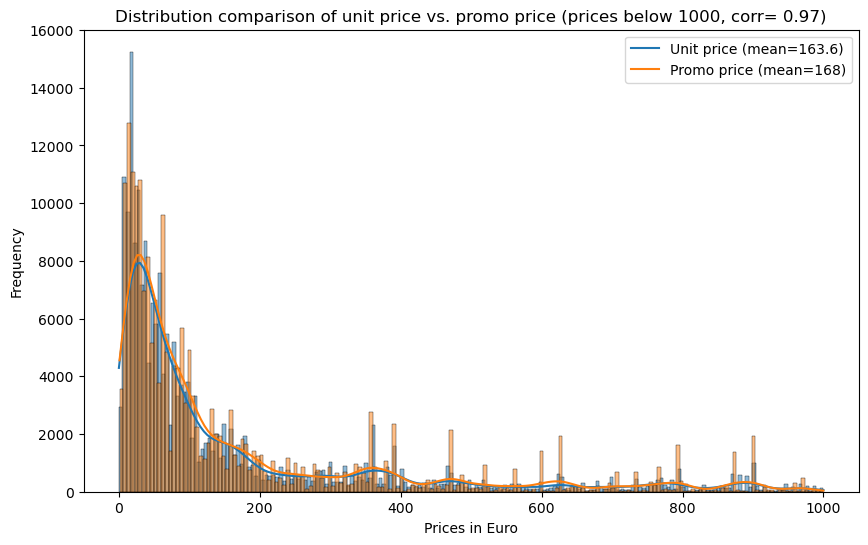

Simple correlation is                  unit_price  mod_promo_price
unit_price             1.00             0.97
mod_promo_price        0.97             1.00
K-S Statistic: 0.03548686273759899
P-value: 7.2035680108642755e-115
Are the columns identical? False


In [360]:
filtered_df = df_merged_final[(df_merged_final['unit_price'] < 1000) & (df_merged_final['mod_promo_price'] < 1000)]

# Visualize the distributions using a histogram
plt.figure(figsize=(10, 6))

sns.histplot(filtered_df['unit_price'], label='unit_price', kde=True, color='tab:blue')
sns.histplot(filtered_df['mod_promo_price'], label='mod_promo_price', kde=True, color='tab:orange')

labels = ["Unit price (mean=163.6)", "Promo price (mean=168)"]
plt.title('Distribution comparison of unit price vs. promo price (prices below 1000, corr= 0.97)')
plt.xlabel('Prices in Euro')
plt.ylabel('Frequency')
plt.legend(labels=labels)
plt.show()

print(f"Simple correlation is", filtered_df[["unit_price", "mod_promo_price"]].corr())

# Perform a statistical test (e.g., Kolmogorov-Smirnov test) for similarity
statistic, p_value = stats.ks_2samp(filtered_df['unit_price'], filtered_df['mod_promo_price'])
print(f"K-S Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if columns are identical
are_identical = filtered_df['unit_price'].equals(filtered_df['mod_promo_price'])
print(f"Are the columns identical? {are_identical}")

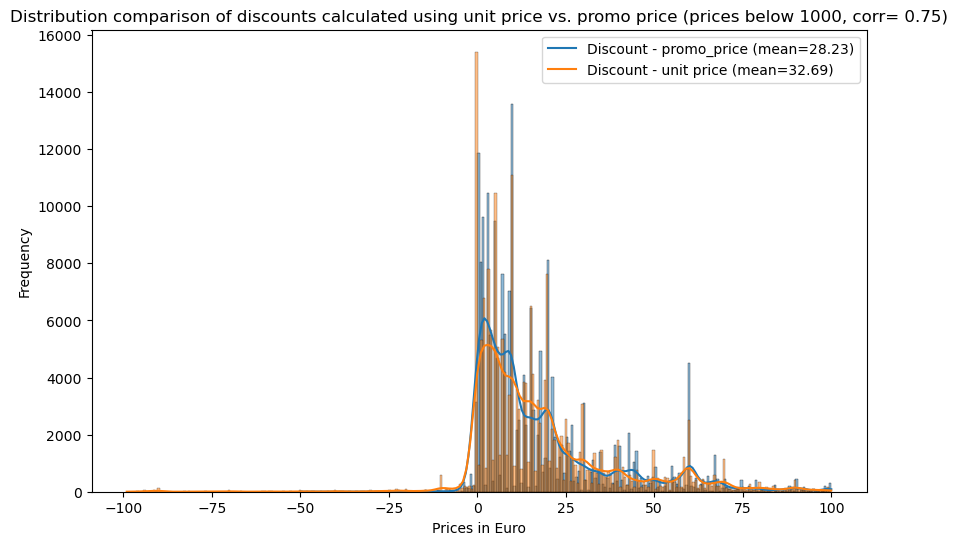

Simple correlation is                      discount  discount_unit_price
discount                 1.00                 0.75
discount_unit_price      0.75                 1.00
K-S Statistic: 0.0688501026694045
P-value: 0.0
Are the columns identical? False


In [362]:
filtered_df = df_merged_new[(abs(df_merged_new['discount']) < 100) & (abs(df_merged_new['discount_unit_price']) < 100)]

# Visualize the distributions using a histogram
plt.figure(figsize=(10, 6))

sns.histplot(filtered_df['discount'], label='discount', kde=True, color='tab:blue')
sns.histplot(filtered_df['discount_unit_price'], label='discount_unit_price', kde=True, color='tab:orange')

labels = ["Discount - promo_price (mean=28.23)", "Discount - unit price (mean=32.69)"]
plt.title('Distribution comparison of discounts calculated using unit price vs. promo price (prices below 1000, corr= 0.75)')
plt.xlabel('Prices in Euro')
plt.ylabel('Frequency')
plt.legend(labels=labels)
plt.show()

print(f"Simple correlation is", filtered_df[["discount", "discount_unit_price"]].corr())

# Check if columns are identical
are_identical = filtered_df['discount'].equals(filtered_df['discount_unit_price'])
print(f"Are the columns identical? {are_identical}")